<a href="https://colab.research.google.com/github/BearsOnMars/baby-alpha/blob/main/Relative_Strength_Index_for_Dow30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RSI for Dow Jones Industrial Average

In [34]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

In [35]:
ticker = '^DJI'
start = dt.datetime(2017, 1, 1)
end = dt.datetime.now() # use now to get the most recent price available

In [36]:
data = web.DataReader(ticker, 'yahoo', start, end)

In [37]:
# calculating price difference from previous day
delta = data['Adj Close'].diff(1)
# dropping not applicable values NA from set
delta.dropna(inplace = True)

In [38]:
# segregating negative and positive price differences
positive = delta.copy()
negative = delta.copy()

In [39]:
# making all negative values in positive as 0 and all positive values in negative as 0
positive[positive < 0] = 0
negative[negative > 0] = 0

In [40]:
# specifying parameters for RSI and calculating mean loss/gain on a continuous rolling basis 
days = 14
average_gain = positive.rolling(window=days).mean()
average_loss = abs(negative.rolling(window=days).mean()) # taking absolute values because we are interested only in difference

In [41]:
# calculating Relative Strength
relative_strength = average_gain / average_loss
RSI = 100.0 - (100.0 /(1.0 + relative_strength))

In [42]:
# creating a combined dataframe
combined = pd.DataFrame()
combined['Adj Close'] = data['Adj Close']
combined['RSI'] = RSI

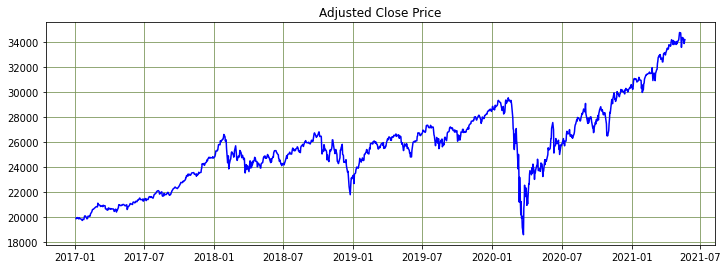

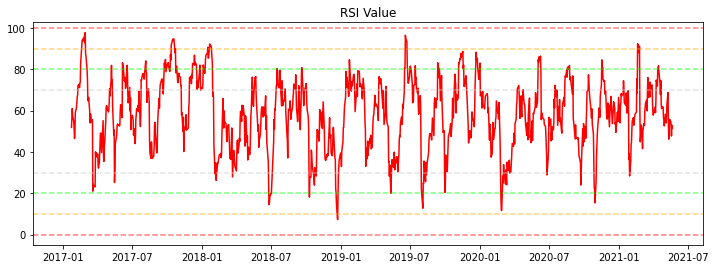

In [88]:
# Plotting the adjusted close value
plt.figure(figsize=(12,9))
ax1 = plt.subplot(211)
ax1.plot(combined.index, combined['Adj Close'], color = 'blue')
ax1.grid(True, color='#789456')
ax1.set_axisbelow(True)
ax1.set_facecolor('white')
ax1.figure.set_facecolor('#ffffff')
ax1.tick_params(axis='x', colors = 'black')
ax1.tick_params(axis = 'y', colors = 'black')
ax1.set_title("Adjusted Close Price", color='black')


# Plotting the RSI
plt.figure(figsize=(12,9))
ax2 = plt.subplot(211, sharex=ax1) # x axis would be same for both subplots
ax2.plot(combined.index, combined['RSI'], color='red')
# plotting oversold and overbought lines for RSI
ax2.axhline(0, linestyle = '--', alpha=0.5, color='red') #hline means horizontal line
ax2.axhline(10, linestyle = '--', alpha=0.5, color='#ffaa00')
ax2.axhline(20, linestyle = '--', alpha=0.5, color='#00ff00')
ax2.axhline(30, linestyle = '--', alpha=0.5, color='#cccccc')
ax2.axhline(70, linestyle = '--', alpha=0.5, color='#cccccc')
ax2.axhline(80, linestyle = '--', alpha=0.5, color='#00ff00')
ax2.axhline(90, linestyle = '--', alpha=0.5, color='#ffaa00')
ax2.axhline(100, linestyle = '--', alpha=0.5, color='red')
ax2.grid(False)
ax2.set_axisbelow(True)
ax2.set_facecolor('white')
ax2.tick_params(axis='x', colors = 'black')
ax2.tick_params(axis = 'y', colors = 'black')
ax2.set_title("RSI Value")
plt.show()